# K-Cluster Algorithm Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\kuohe\Medical Cost Personal Datasets 1-30-2024'

In [4]:
df_insurance_checked = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'insurance_checked.csv'), index_col = False)

In [5]:
df_insurance_checked.head()

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df_insurance_checked.shape

(1337, 8)

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
drop_columns = ['Unnamed: 0', 'sex', 'smoker', 'region']
df_insurance_checked = df_insurance_checked.drop(columns=drop_columns)

In [13]:
score = [kmeans[i].fit(df_insurance_checked).score(df_insurance_checked) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.

score

C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[-195939158682.99286,
 -47969960260.4719,
 -22937153343.398376,
 -12118189115.397701,
 -8534185334.338444,
 -6164301639.164811,
 -4432406493.133601,
 -3494205190.415878,
 -2779491869.659236]

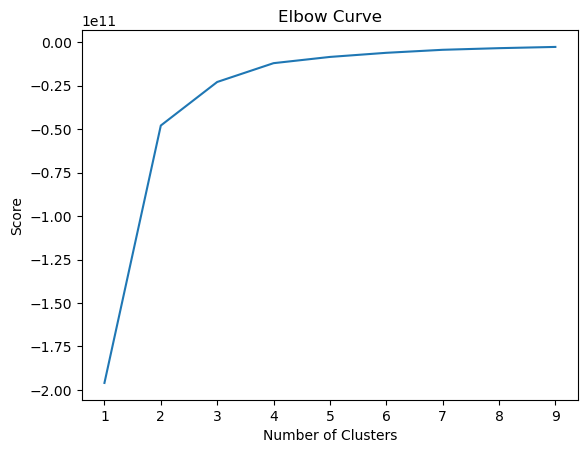

In [14]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## K-means Clustering

In [18]:
# Create the k-means object.

kmeans = KMeans(n_init=10,n_clusters = 3) 

In [20]:
# Fit the k-means object to the data.

kmeans.fit(df_insurance_checked)

C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=3, n_init=10)

In [21]:
df_insurance_checked['clusters'] = kmeans.fit_predict(df_insurance_checked) #adding clusters column to a dataframe

C:\Users\kuohe\anaconda2\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [22]:
df_insurance_checked.head()

,age,bmi,children,charges,clusters
0,19,27.900,0,16884.92400,1
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,1
4,32,28.880,0,3866.85520,0


In [23]:
df_insurance_checked['clusters'].value_counts()

clusters
0    910
1    270
2    157
Name: count, dtype: int64

## Age compared to Insurance Chages

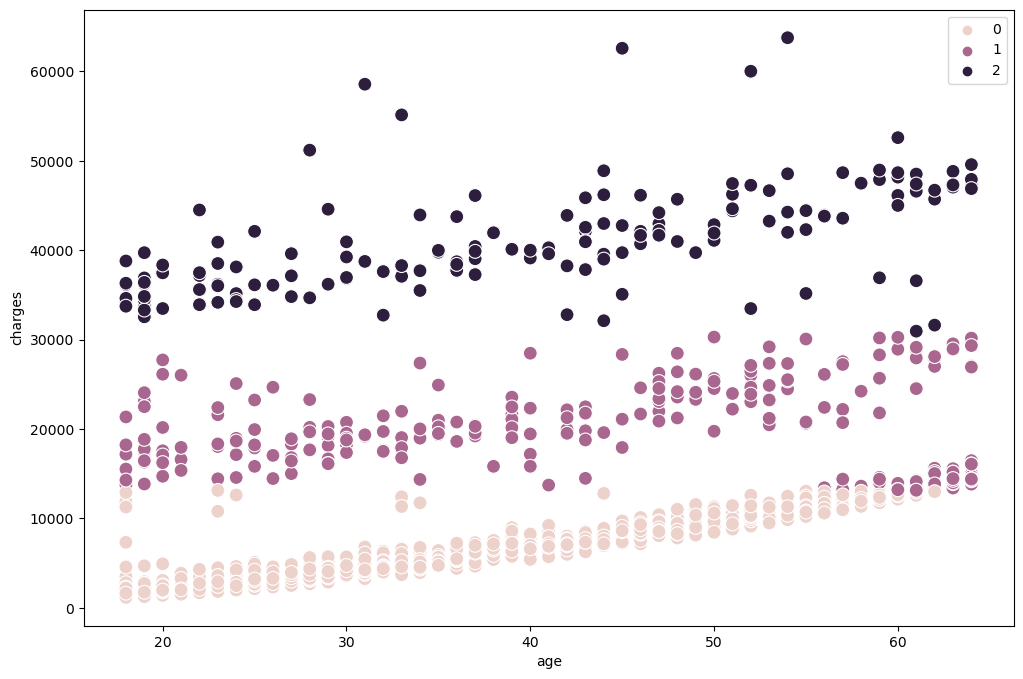

In [24]:
# Plot the clusters for the "age" and "charges" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_insurance_checked['age'], y=df_insurance_checked['charges'], hue=kmeans.labels_, s=100)

ax.grid(False)  
plt.xlabel('age')  
plt.ylabel('charges')  
plt.show()


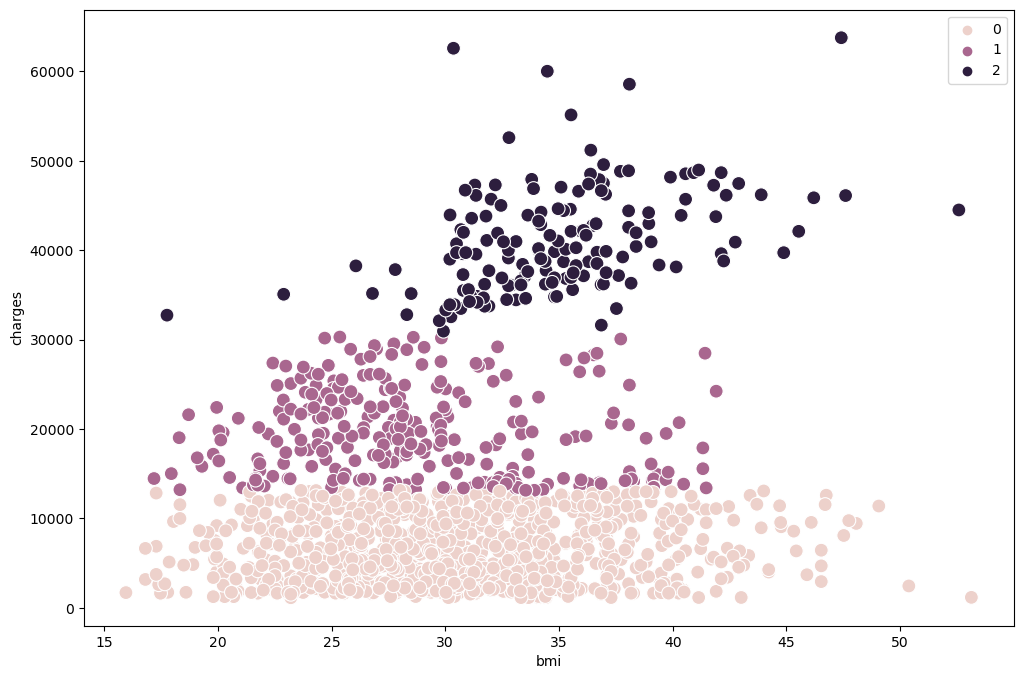

In [25]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_insurance_checked['bmi'], y=df_insurance_checked['charges'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('bmi') 
plt.ylabel('charges')
plt.show()


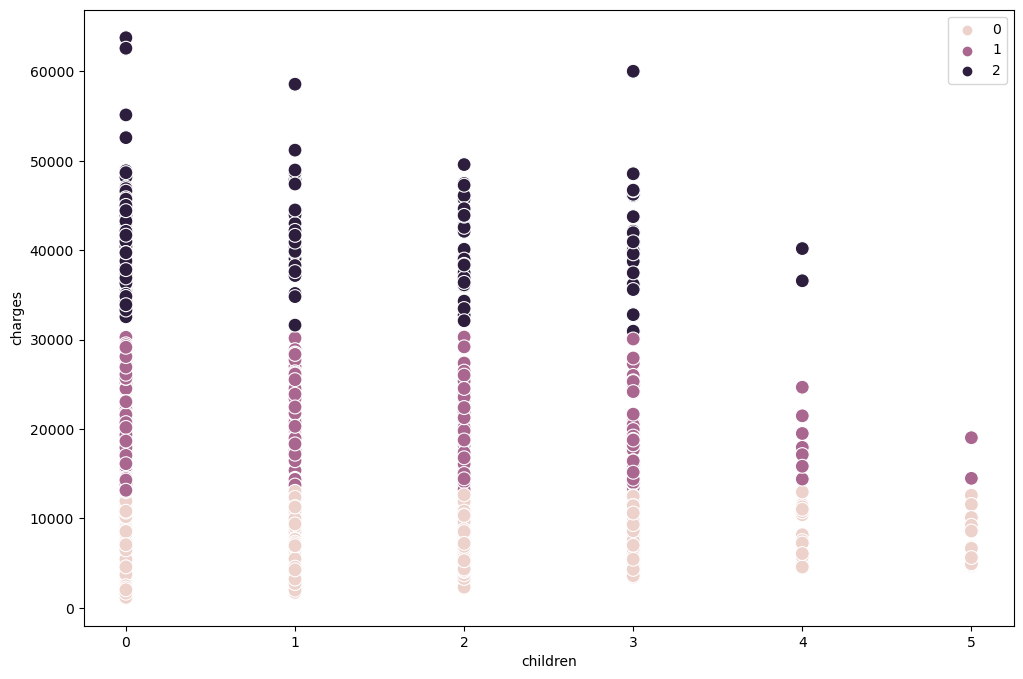

In [26]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_insurance_checked['children'], y=df_insurance_checked['charges'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('children') 
plt.ylabel('charges')
plt.show()


### Key Takeaways
The k-means clustering visualization across 'age', 'bmi', 'children', and 'charges' suggests complex relationships. 'Age vs. Charges' doesn't show clear clustering, implying age isn't a strong standalone factor for insurance charges. 'BMI vs. Charges' reveals a more pronounced trend, where higher BMI correlates with increased charges, yet the effect plateaus, as evidenced by the central dense cluster. 'Children vs. Charges' indicates that the number of children has a minimal impact on the clustering of charges. The insights suggest that while individual factors like BMI do influence charges, a multifaceted approach considering additional variables could provide a more nuanced understanding of the determinants of insurance charges.

In [29]:
# Convert 'clusters' column to string type to avoid error
df_insurance_checked['clusters'] = df_insurance_checked['clusters'].astype(str)


df_insurance_checked.loc[df_insurance_checked['clusters'] == '0', 'clusters'] = 'High Charges'
df_insurance_checked.loc[df_insurance_checked['clusters'] == '1', 'clusters'] = 'Medium Charges'
df_insurance_checked.loc[df_insurance_checked['clusters'] == '2', 'clusters'] = 'Low Charges'


In [30]:
df_insurance_checked['clusters'].value_counts()

clusters
High Charges      910
Medium Charges    270
Low Charges       157
Name: count, dtype: int64

In [31]:
path2= r'C:\Users\kuohe\Medical Cost Personal Datasets 1-30-2024'

In [34]:
df_insurance_checked.to_csv(os.path.join(path2, '02 Data', 'Prepared Data', 'insurance_clusters.csv'))